# Project: No-Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The No-Show Medical Appointments dataset contains information on 100,000 medical appointments in Brazil. The primary goal of this analysis is to explore factors that influence whether a patient shows up for their scheduled appointment.

This dataset includes details about the patient's health conditions and appointment scheduling, which can help in understanding trends related to patient attendance.

1) PatientId: Unique identifier for each patient.

2) AppointmentID: Unique identifier for each medical appointment.

3) Gender: The gender of the patient.


4) ScheduledDay: The date and time when the appointment was scheduled.

5) AppointmentDay: The date of the actual medical appointment.

6) Age: The age of the patient.

7) Neighbourhood: The location of the health facility.

8) Scholarship: Whether the patient is enrolled in the welfare program.

9) Hypertension: Indicates if the patient has hypertension.

10) Diabetes: Indicates if the patient has diabetes.

11) Alcoholism: Indicates if the patient has a history of alcoholism.

12) Handicap: Indicates if the patient has any disabilities.

13) SMS_received: Indicates whether the patient received an SMS reminder for the appointment.

14) No-show: The target column, indicating whether the patient showed up for the appointment.

### Question(s) for Analysis

1) Are patients from certain neighborhoods more likely to attend or miss appointments?
2) What are the demographic characteristics (age and gender) of patients who miss appointments?
3) Does being enrolled in the Bolsa Família welfare program impact attendance rates?
4) Does receiving an SMS reminder actually reduce no-shows?
5) Are patients with hypertension or diabetes more likely to miss appointments?
_______________________________________________________________________________________________


## Required Libraries

Imports the Pandas library, which is used for data manipulation and analysis.

Imports Matplotlib's Pyplot module for creating static, animated, and interactive visualizations.

Imports Seaborn, a statistical data visualization library built on top of Matplotlib.

Imports NumPy, a library for numerical computing and handling arrays efficiently.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Load Dataset & Inspect Basic Information

the code reads a CSV file containing appointment data into a Pandas DataFrame and then displays the first few rows to give an overview of the dataset’s structure and contents.

In [2]:
df = pd.read_csv("/kaggle/input/no-show-appointments/KaggleV2-May-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


_______________________________________________________________________________________________

In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


This method ( .tail() ) provides a quick look at the final rows of the dataset, aiding in data exploration and validation.
_______________________________________________________________________________________________

In [4]:
df.shape

(110527, 14)

This method ( .shape ) provides a simple way to check the dataset’s size, which is essential for data analysis and preprocessing.
_______________________________________________________________________________________________

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This method (.info() )is useful for quickly understanding the dataset's structure, identifying missing values, and checking data types for preprocessing.
_______________________________________________________________________________________________

In [6]:
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

This method returns the unique values present in the "No-show" column of the DataFrame.

It helps in understanding the different categories or labels in this column.
_______________________________________________________________________________________________

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This method ( .describe() ) generates summary statistics for numerical columns in the DataFrame.
_______________________________________________________________________________________________

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This method ( .nunique() ) returns the number of unique values in each column of the DataFrame.
_______________________________________________________________________________________________

### Data Cleaning


#### Data cleaning is crucial to ensure the dataset is free of inconsistencies, missing values, or incorrect data that may affect our analysis.

In [9]:
df.duplicated().sum()

0

This method is useful for detecting duplicate records, which can help in data cleaning and preprocessing before analysis.
_______________________________________________________________________________________________

In [10]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

This method is useful for identifying columns with missing values, which can guide data cleaning and imputation processes.
_______________________________________________________________________________________________

In [11]:
df.columns = df.columns.str.lower().str.replace("-", "_").str.strip()

print("Updated Column Names:", df.columns)

Updated Column Names: Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')


This code standardizes column names to improve consistency and usability in the dataset, especially for tasks like data analysis and visualization.
_______________________________________________________________________________________________

In [12]:
df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"])

print(df.dtypes)

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object


These lines ensure that the "scheduledday" and "appointmentday" columns are in the correct format for date/time-related operations, which is crucial for time-based analysis, like calculating time intervals or performing date-related grouping.
_______________________________________________________________________________________________

## Exploratory Data Analysis

In [13]:
numeric_summary = df.describe().T
numeric_summary[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
patientid,1.474963e+14,3.173184e+13,2.560949e+14,3.921784e+04,9.999816e+14
appointmentid,5.675305e+06,5.680573e+06,7.129575e+04,5.030230e+06,5.790484e+06
age,3.708887e+01,3.700000e+01,2.311020e+01,-1.000000e+00,1.150000e+02
scholarship,9.826558e-02,0.000000e+00,2.976748e-01,0.000000e+00,1.000000e+00
hipertension,1.972459e-01,0.000000e+00,3.979213e-01,0.000000e+00,1.000000e+00
diabetes,7.186479e-02,0.000000e+00,2.582651e-01,0.000000e+00,1.000000e+00
alcoholism,3.039981e-02,0.000000e+00,1.716856e-01,0.000000e+00,1.000000e+00
handcap,2.224796e-02,0.000000e+00,1.615427e-01,0.000000e+00,4.000000e+00
sms_received,3.210256e-01,0.000000e+00,4.668727e-01,0.000000e+00,1.000000e+00


This code gives a detailed statistical summary of the numerical columns, allowing you to quickly assess central tendencies (mean, median), spread (standard deviation), and the range (min, max) of each column's values. This is helpful for data exploration and identifying patterns or outliers.
_______________________________________________________________________________________________

In [14]:
total_appointments = df.shape[0]
missed_appointments = df[df['no_show'] == 'Yes'].shape[0]

missed_percentage = (missed_appointments / total_appointments) * 100

print(f"Total Appointments: {total_appointments}")
print(f"Missed Appointments: {missed_appointments} ({missed_percentage:.2f}%)")

Total Appointments: 110527
Missed Appointments: 22319 (20.19%)


In the dataset, there are a total of 110,527 appointments. Out of these, 22,319 appointments were missed, as indicated by the "no_show" column marked as 'Yes'. This means that 20.19% of the total appointments were missed, highlighting a significant portion of patients who did not attend their scheduled appointments. This percentage can be valuable for understanding trends, patient behavior, and potentially identifying factors that contribute to missed appointments, which could be useful for improving healthcare services or appointment management strategies.

_______________________________________________________________________________________________

In [15]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
F    71840
M    38687
Name: count, dtype: int64


The dataset contains 71,840 female (F) and 38,687 male (M) records, indicating a higher number of female patients compared to male patients. This distribution provides insight into the gender composition of the appointments, which could be useful for understanding trends or targeting specific demographic groups in healthcare analyses.
_______________________________________________________________________________________________


In [16]:
age_summary = df['age'].describe()[['mean', '50%', 'std']]
print(age_summary)

mean    37.088874
50%     37.000000
std     23.110205
Name: age, dtype: float64


The average age of patients in the dataset is approximately 37.09 years, with a median age of 37 years, indicating a fairly balanced distribution around the middle age. The standard deviation of 23.11 suggests a wide range of ages, meaning there are both younger and older patients included in the dataset, highlighting diversity in age among the appointments.
_______________________________________________________________________________________________



In [17]:
sms_counts = df['sms_received'].value_counts()
print(sms_counts)

sms_received
0    75045
1    35482
Name: count, dtype: int64


The dataset shows that 75,045 patients did not receive an SMS reminder, while 35,482 patients received one. This indicates that the majority of patients were not contacted via SMS, which could provide insights into communication strategies and their potential impact on appointment attendance.
_______________________________________________________________________________________________


### Question 1: Are patients from certain neighborhoods more likely to attend or miss appointments?

In [18]:
no_show_rates = df.groupby('neighbourhood')['no_show'].value_counts(normalize=True).unstack() * 100
no_show_rates = no_show_rates['Yes']

no_show_rates = no_show_rates.sort_values(ascending=False).reset_index()
no_show_rates.columns = ['neighbourhood', 'no-show rate']

no_show_rates.head(10)

,neighbourhood,no-show rate
0,ILHAS OCEÂNICAS DE TRINDADE,100.000000
1,SANTOS DUMONT,28.918495
2,SANTA CECÍLIA,27.455357
3,SANTA CLARA,26.482213
4,ITARARÉ,26.266363
5,JESUS DE NAZARETH,24.395373
6,HORTO,24.000000
7,ILHA DO PRÍNCIPE,23.477493
8,CARATOÍRA,23.040936
9,ANDORINHAS,23.032714


The table shows the top 10 neighborhoods with the highest no-show rates, which represent the percentage of missed appointments. This can help identify areas where patients are more likely to miss appointments, potentially leading to targeted interventions or further analysis.
_______________________________________________________________________________________________


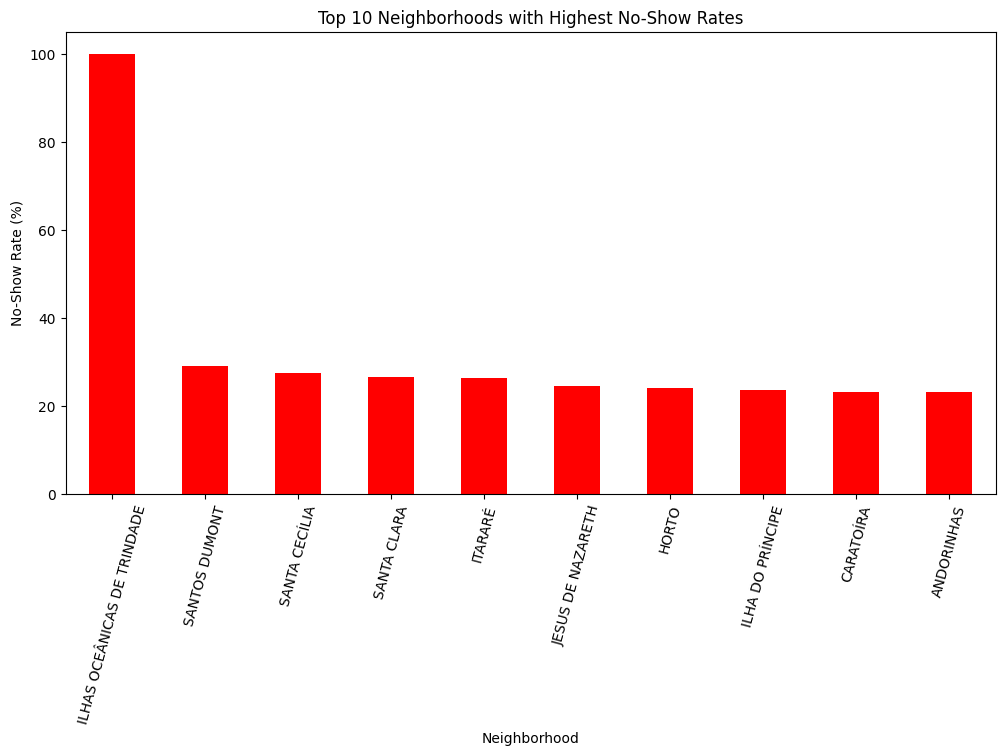

In [19]:
neighborhood_no_show = df.groupby('neighbourhood')['no_show'].value_counts(normalize=True).unstack() * 100
neighborhood_no_show = neighborhood_no_show.sort_values(by='Yes', ascending=False).head(10)

plt.figure(figsize=(12,6))
neighborhood_no_show['Yes'].plot(kind="bar", color="red")
plt.title("Top 10 Neighborhoods with Highest No-Show Rates")
plt.xlabel("Neighborhood")
plt.ylabel("No-Show Rate (%)")
plt.xticks(rotation=75)
plt.show()


The bar chart visualizes the top 10 neighborhoods with the highest no-show rates for medical appointments. The x-axis represents different neighborhoods, while the y-axis shows the percentage of missed appointments. The neighborhood "ILHAS OCEÂNICAS DE TRINDADE" has an extremely high no-show rate compared to others, standing out significantly. Other neighborhoods, such as "SANTOS DUMONT" and "SANTA CECÍLIA," also show relatively high no-show rates but at a much lower scale than the first. This visualization helps identify areas where appointment attendance is a major issue, allowing for targeted interventions to improve healthcare efficiency.

_______________________________________________________________________________________________



/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


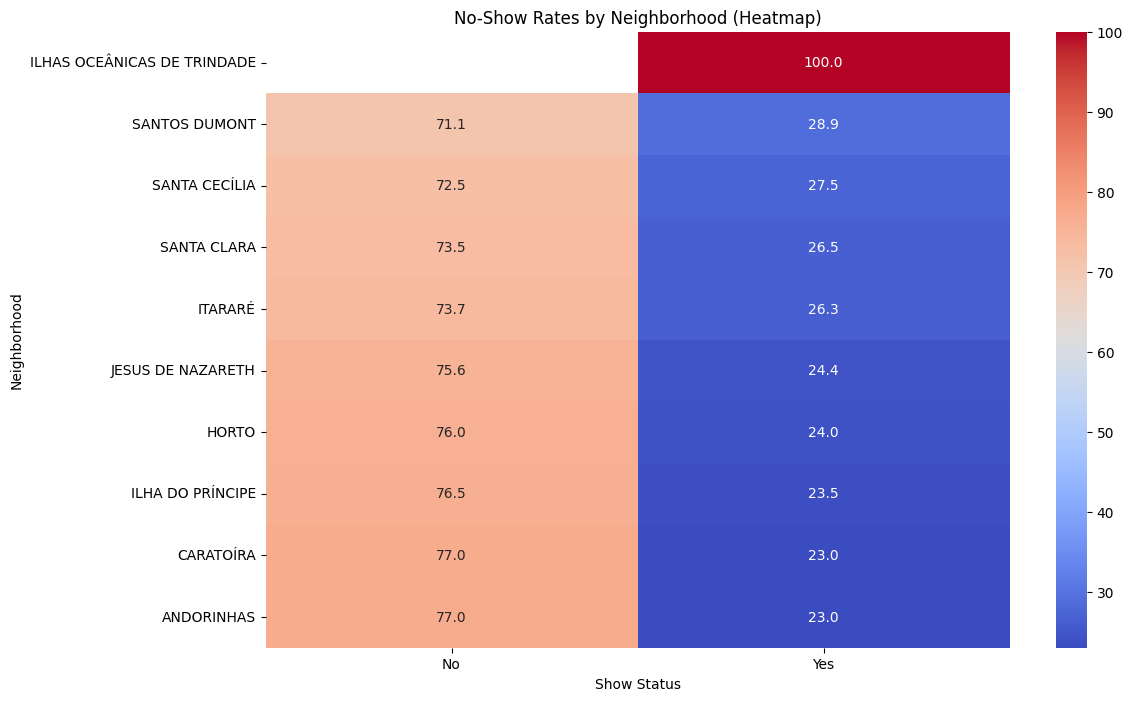

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(neighborhood_no_show, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("No-Show Rates by Neighborhood (Heatmap)")
plt.xlabel("Show Status")
plt.ylabel("Neighborhood")
plt.show()

Heatmap of No-Show Rates (as above but usong heatmap)
_______________________________________________________________________________________________

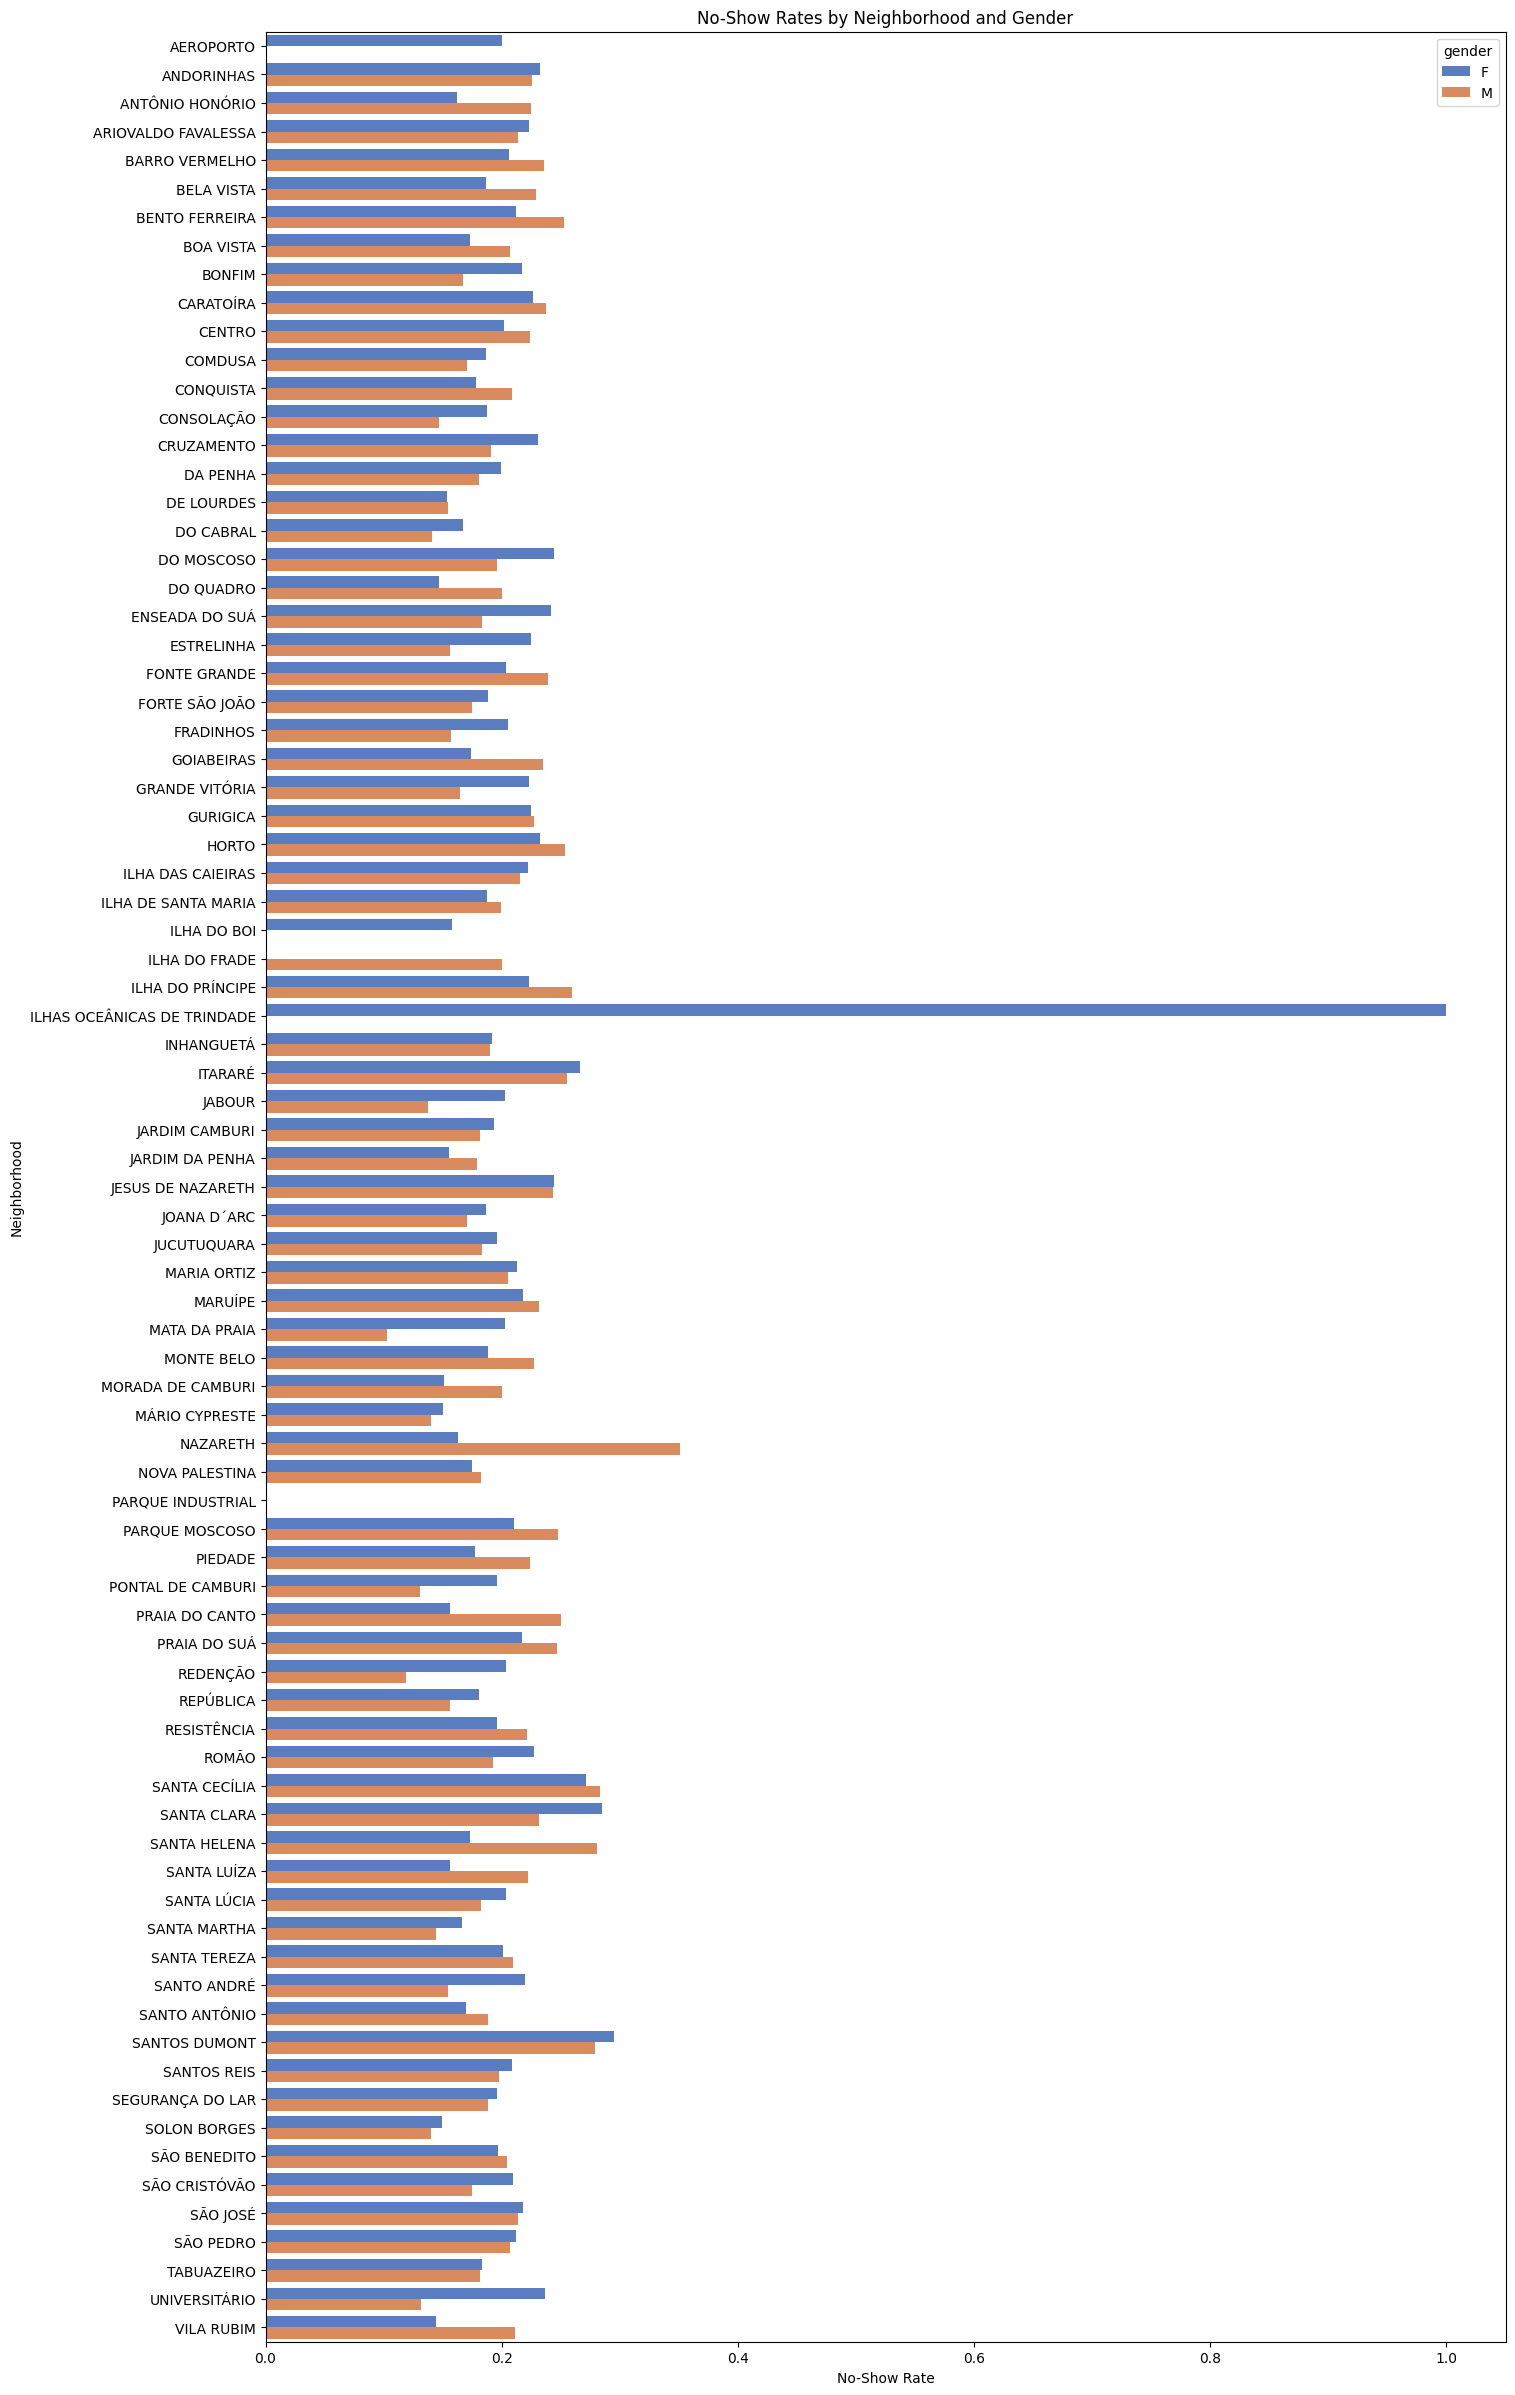

In [21]:
gender_no_show = df.groupby(['neighbourhood', 'gender'])['no_show'].value_counts(normalize=True).unstack().fillna(0)
gender_no_show['no_show_rate'] = gender_no_show['Yes']

plt.figure(figsize=(16, 30))
sns.barplot(data=gender_no_show.reset_index(), x='no_show_rate', y='neighbourhood', hue='gender', palette='muted')
plt.title('No-Show Rates by Neighborhood and Gender')
plt.xlabel('No-Show Rate')
plt.ylabel('Neighborhood')
plt.show()


### Summary
1) Ilhas Oceânicas de Trindade has the highest no-show rates.
2) females slightly higher no-show rates than males across neighborhoods.
_______________________________________________________________________________________________

### Question 2:  What are the demographic characteristics (age and gender) of patients who miss appointments?

In [22]:
gender_no_show = df.groupby('gender')['no_show'].value_counts(normalize=True).unstack() * 100
print(gender_no_show)


no_show         No        Yes
gender                       
F        79.685412  20.314588
M        80.032052  19.967948


The no-show rate for females (20.31%) is slightly higher than that of males (19.97%), though the difference is small. This suggests that gender does not have a significant impact on appointment attendance, but females have a marginally higher tendency to miss their appointments.
_______________________________________________________________________________________________

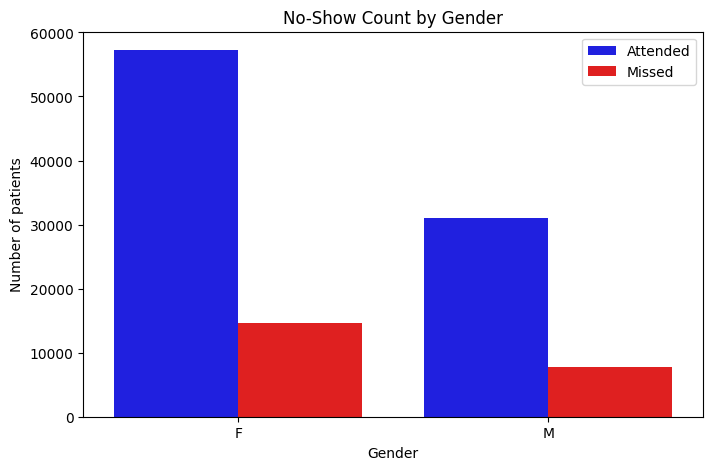

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="gender", hue="no_show", palette=["blue", "red"])
plt.title("No-Show Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of patients")
plt.legend(["Attended", "Missed"])
plt.show()

The Bar chart shows that female patients have a higher total number of appointments compared to male patients, with more attending and missing their appointments.
_______________________________________________________________________________________________

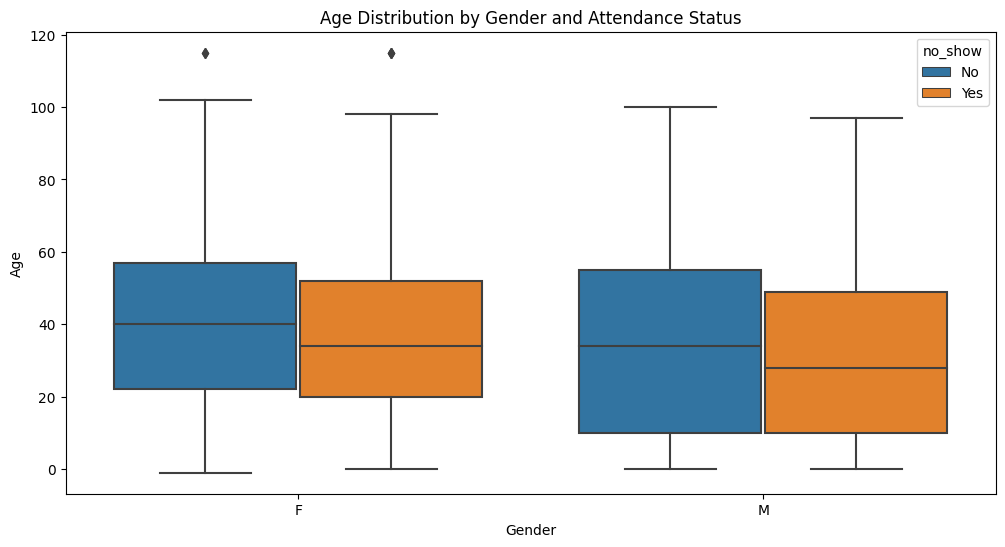

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='age', hue='no_show', data=df , dodge=True)
plt.title('Age Distribution by Gender and Attendance Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

The age factor seems to influence appointment attendance, with younger patients missing more frequently. This insight can be useful for designing targeted strategies, such as reminders for younger demographics.
_______________________________________________________________________________________________

<ipython-input-61-256abe4a0530>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_counts = df.groupby(['age_Group', 'gender', 'no_show']).size().unstack(fill_value=0)


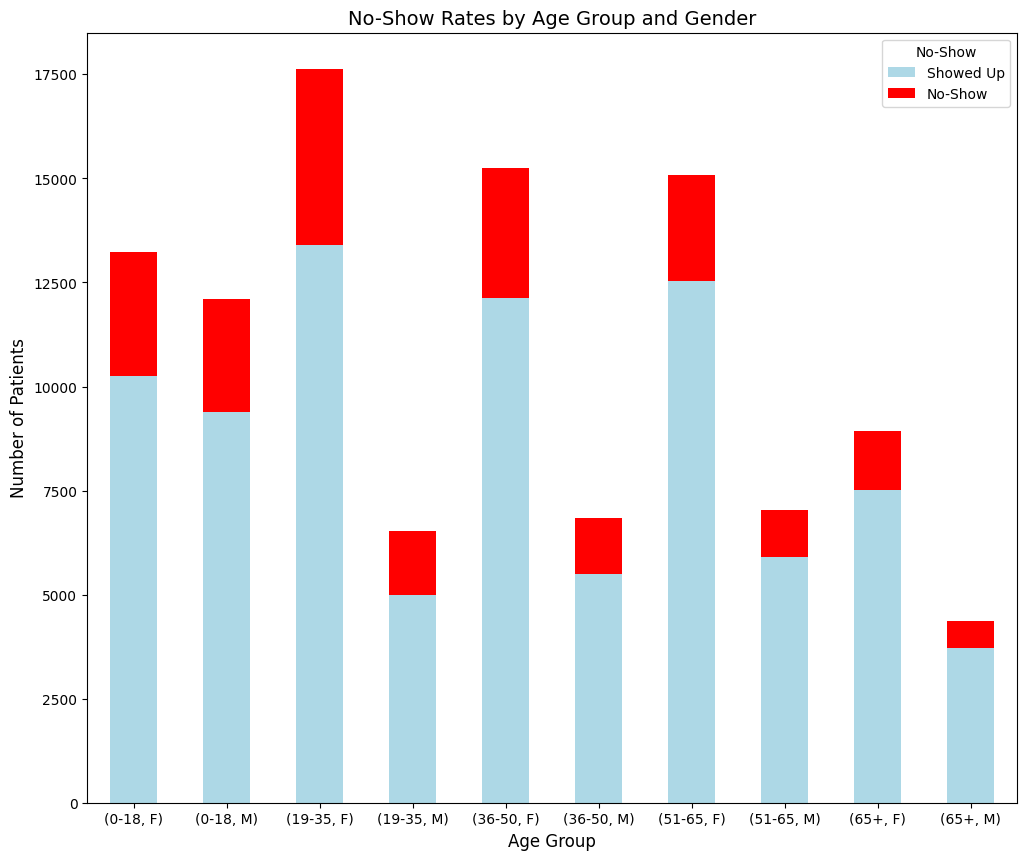

In [61]:
df['age_Group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=["0-18", "19-35", "36-50", "51-65", "65+"])

no_show_counts = df.groupby(['age_Group', 'gender', 'no_show']).size().unstack(fill_value=0)

no_show_counts.plot(kind='bar', stacked=True, figsize=(12, 10), color=["lightblue", "red"])

plt.title('No-Show Rates by Age Group and Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='No-Show', labels=['Showed Up', 'No-Show'], loc='upper right')
plt.xticks(rotation=0) 
plt.show()

### Summary
Young adults, especially females aged 19-35, have the highest no-show rates, highlighting the need for targeted interventions. In contrast, older adults (51+ years) show greater reliability in attending appointments.
_______________________________________________________________________________________________

### Question 3: Does being enrolled in the Bolsa Família welfare program impact attendance rates?

In [25]:
scholarship_summary = df.groupby("scholarship")["no_show"].value_counts().unstack()

scholarship_summary.columns = ["Attended", "Missed"]

scholarship_summary["Total"] = scholarship_summary["Attended"] + scholarship_summary["Missed"]
scholarship_summary["Missed (%)"] = (scholarship_summary["Missed"] / scholarship_summary["Total"]) * 100
scholarship_summary["Attended (%)"] = (scholarship_summary["Attended"] / scholarship_summary["Total"]) * 100

scholarship_summary.index = ["Not Enrolled (0)", "Enrolled (1)"]

print(scholarship_summary)

                  Attended  Missed  Total  Missed (%)  Attended (%)
Not Enrolled (0)     79925   19741  99666   19.807156     80.192844
Enrolled (1)          8283    2578  10861   23.736304     76.263696


Patients enrolled in the scholarship program have a higher no-show rate (23.74%) compared to those not enrolled (19.81%).
_______________________________________________________________________________________________

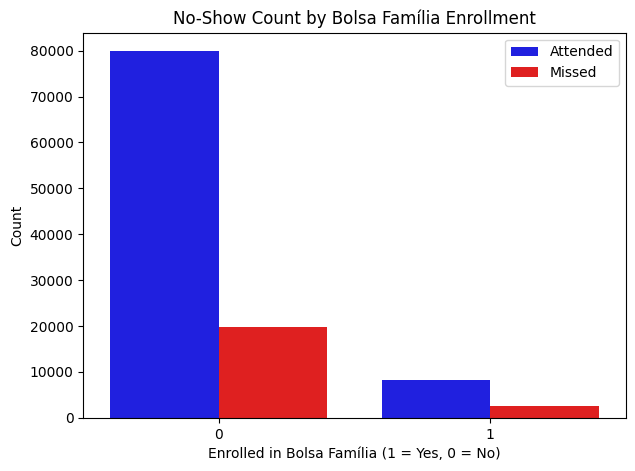

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="scholarship", hue="no_show", palette=["blue", "red"])
plt.title("No-Show Count by Bolsa Família Enrollment")
plt.xlabel("Enrolled in Bolsa Família (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.legend(["Attended", "Missed"])
plt.show()

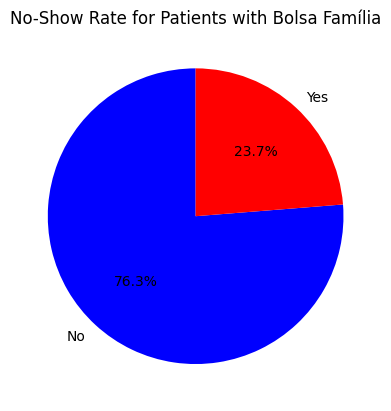

In [27]:
scholarship_no_show = df.groupby('scholarship')['no_show'].value_counts(normalize=True).unstack() * 100
scholarship_no_show.loc[1].plot(kind="pie", autopct="%1.1f%%", colors=["blue", "red"], startangle=90)
plt.title("No-Show Rate for Patients with Bolsa Família")
plt.ylabel("")
plt.show()

### Summary

Most patients in the dataset are not enrolled in Bolsa Família, and they generally have higher attendance rates.

Patients who are enrolled in Bolsa Família tend to have a higher no-show rate, suggesting possible financial, logistical, or other barriers affecting their ability to attend medical appointments.
_______________________________________________________________________________________________

### Question 4: Does receiving an SMS reminder actually affect no-shows?

In [28]:
sms_summary = df.groupby("sms_received")["no_show"].value_counts().unstack()
sms_summary.columns = ["Attended", "Missed"]

sms_summary["Total"] = sms_summary["Attended"] + sms_summary["Missed"]
sms_summary["Missed (%)"] = (sms_summary["Missed"] / sms_summary["Total"]) * 100
sms_summary["Attended (%)"] = (sms_summary["Attended"] / sms_summary["Total"]) * 100

sms_summary.index = ["No SMS (0)", "Received SMS (1)"]

print(sms_summary)

                  Attended  Missed  Total  Missed (%)  Attended (%)
No SMS (0)           62510   12535  75045   16.703311     83.296689
Received SMS (1)     25698    9784  35482   27.574545     72.425455


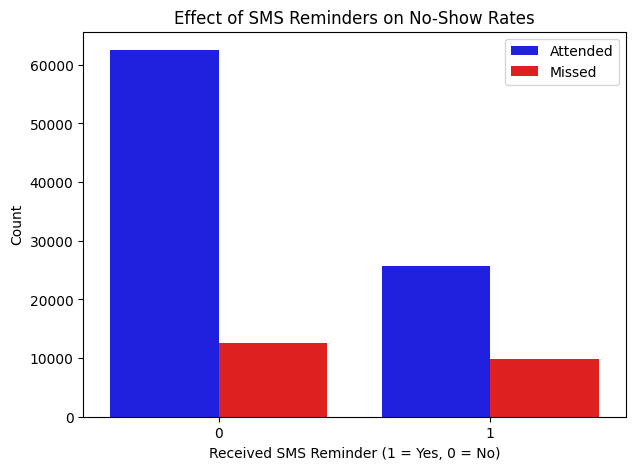

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="sms_received", hue="no_show", palette=["blue", "red"])
plt.title("Effect of SMS Reminders on No-Show Rates")
plt.xlabel("Received SMS Reminder (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.legend(["Attended", "Missed"])
plt.show()

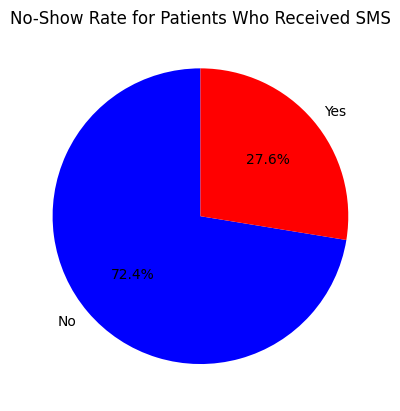

In [30]:
sms_no_show = df.groupby('sms_received')['no_show'].value_counts(normalize=True).unstack() * 100
sms_no_show.loc[1].plot(kind="pie", autopct="%1.1f%%", colors=["blue", "red"], startangle=90)
plt.title("No-Show Rate for Patients Who Received SMS")
plt.ylabel("")
plt.show()

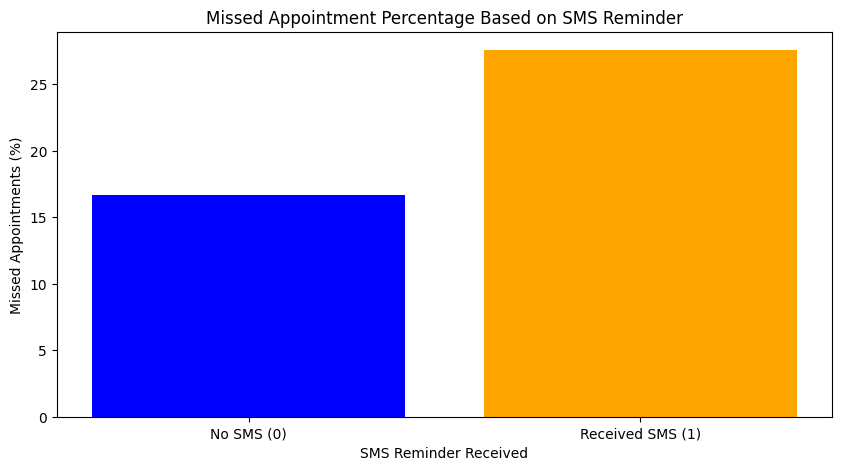

In [31]:
plt.figure(figsize=(10,5))
plt.bar(sms_summary.index, sms_summary["Missed (%)"], color=['blue', 'orange'])
plt.xlabel("SMS Reminder Received")
plt.ylabel("Missed Appointments (%)")
plt.title("Missed Appointment Percentage Based on SMS Reminder")
plt.show()

### Summary

Surprisingly, patients who received an SMS reminder had a higher no-show rate (27.57%) compared to those who did not receive one (16.70%). This suggests that SMS reminders alone may not be effective.

_______________________________________________________________________________________________

### Question 5: Are patients with hypertension or diabetes more likely to miss appointments?

In [62]:
chronic_summary = df.groupby(["hipertension", "diabetes"])["no_show"].value_counts().unstack()

chronic_summary.columns = ["Attended", "Missed"]

chronic_summary["Total"] = chronic_summary["Attended"] + chronic_summary["Missed"]
chronic_summary["Missed (%)"] = (chronic_summary["Missed"] / chronic_summary["Total"]) * 100
chronic_summary["Attended (%)"] = (chronic_summary["Attended"] / chronic_summary["Total"]) * 100

chronic_summary.index = ["No Hypertension & No Diabetes", "Hypertension Only", "Diabetes Only", "Both Conditions"]

print(chronic_summary)

                               Attended  Missed  Total  Missed (%)  \
No Hypertension & No Diabetes     69011   18258  87269   20.921519   
Hypertension Only                  1168     289   1457   19.835278   
Diabetes Only                     12684    2631  15315   17.179236   
Both Conditions                    5345    1141   6486   17.591736   

                               Attended (%)  
No Hypertension & No Diabetes     79.078481  
Hypertension Only                 80.164722  
Diabetes Only                     82.820764  
Both Conditions                   82.408264  


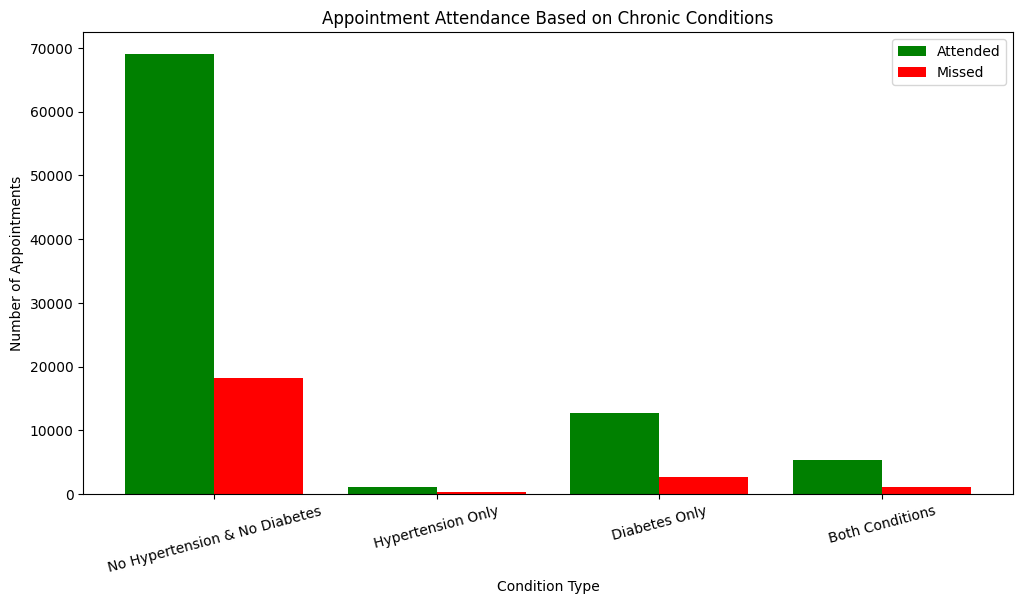

In [63]:
conditions = chronic_summary.index
attended = chronic_summary["Attended"]
missed = chronic_summary["Missed"]

bar_width = 0.4
x = np.arange(len(conditions))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, attended, bar_width, label="Attended", color="green")
plt.bar(x + bar_width/2, missed, bar_width, label="Missed", color="red")

plt.xlabel("Condition Type")
plt.ylabel("Number of Appointments")
plt.title("Appointment Attendance Based on Chronic Conditions")
plt.xticks(ticks=x, labels=conditions, rotation=15)
plt.legend()
plt.show()

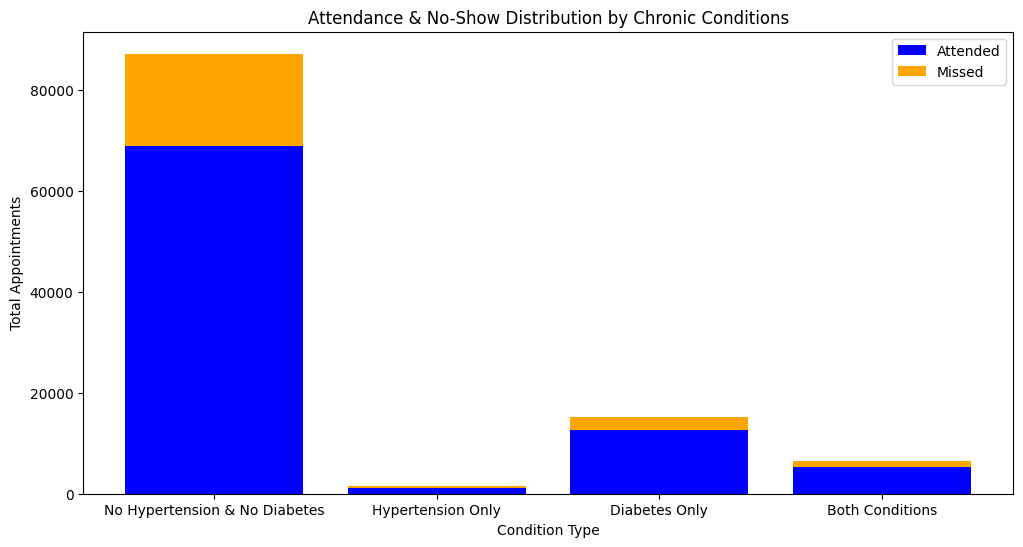

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(conditions, chronic_summary["Attended"], color="blue", label="Attended")
plt.bar(conditions, chronic_summary["Missed"], color="orange", bottom=chronic_summary["Attended"], label="Missed")

plt.xlabel("Condition Type")
plt.ylabel("Total Appointments")
plt.title("Attendance & No-Show Distribution by Chronic Conditions")
plt.legend()
plt.show()

### Summary 

Patients with chronic conditions, especially those with diabetes or both conditions, are more committed to attending their appointments. This suggests that those managing chronic illnesses may be more engaged in their healthcare, while healthier individuals may require more targeted interventions to improve attendance.

_______________________________________________________________________________________________

## Conclosion

1) Neighborhood Influence: Certain neighborhoods, like ILHAS OCEÂNICAS DE TRINDADE (100%), have significantly higher no-show rates, suggesting location-based barriers to healthcare access.

2) Demographics: Young adults, especially females aged 19-35, have the highest no-show rates, while older adults (51+) are more reliable in attending appointments.

3) Bolsa Família Enrollment: Enrolled patients have a higher no-show rate (23.7%) than non-enrolled ones (19.8%), indicating financial aid alone is not enough to ensure attendance.

4) SMS Reminders: Patients who received SMS reminders had higher no-show rates (27.6%), suggesting reminders alone are ineffective without additional engagement strategies.

5) Chronic Conditions: Patients with hypertension or diabetes have lower no-show rates (~17-19%), likely due to the necessity of regular medical care.


### Limitations: 

1) External factors like transportation, weather, or clinic accessibility were not considered.
   
2) The analysis focuses only on historical appointment data, lacking insights into patient motivations for missing visits.


### Future Work:

1) Explore machine learning models to predict high-risk no-show patients for proactive interventions.
2) Conduct qualitative studies to understand why patients miss appointments beyond numerical analysis
